In [2]:
cd "~/Snudda"

/home/ubuntu/Snudda


### The network has been already built on the Striatum_100.ipynb. We are skipping the creation and going directly to the simulation part.

## Simulate the network

Set up striatal network of 100 neurons. This writes the configuration file `network-config.json` (see the last line of the output). Option `--overwrite` allows to overwrite the network's directory if it exists.


In [ ]:
!snudda init networks/tinySim --size 100 --overwrite

Place the neurons based on the network config file. Positions are written to the file `network-neuron-positions.hdf5`.

In [ ]:
!snudda place networks/tinySim

Detect the apposition points where axons and dendrites of different neurons overlap.  
**NOTE**: this takes about 10 minutes on a common desktop.

In [ ]:
!snudda detect networks/tinySim

Prune the detected appositions to get the set of synapses.

In [ ]:
!snudda prune networks/tinySim

Generate external input events for the network. A 1 second duration of the simulation is reserved.

In [ ]:
!snudda input networks/tinySim --input snudda/data/config/input-tinytest-v6.json --time 1.0

### Compile MOD files
*not necessary - requirementes are already met by following the instructions.txt*

In [ ]:
#!nrnivmodl snudda/data/cellspecs-v2/mechanisms

### Run the simulation

Option `--time` defines duration of the simulation, in seconds. It can't be longer than the duration of the external input reserved above. Try 100 milliseconds for a very short simulation. -> *if we are increasing simulation time, increase input time as well*

**NOTE**: this takes about 15 minutes on a common desktop. -- *took 11 minutes*

#### Here we run a 500 ms simulation, took about 50 minutes.

In [3]:
!snudda simulate networks/tinySim --time 0.5 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt_2.txt

--No graphics will be displayed.
Using input file networks/tinySim/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableConnection=None, disableGJ=False, h5legacy=False, hvsize=None, input='networks/tinySim/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/tinySim', profile=False, recordGapJunctions=None, recordPointProcess=None, size=None, spikesOut=None, time=0.5, verbose=False, voltOut='networks/tinySim/simulation/volt_2.txt', volumeID=None)
Using networkFile: networks/tinySim/network-pruned-synapses.hdf5
Using inputFile: networks/tinySim/input-spikes.hdf5
Using logFile: networks/tinySim/log/network-simulation-log.txt
I am node 0
Worker 0: Loading network from networks/tinySim/network-pruned-synapses.hdf5
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6879 synapses and 10000 gap junctions
Load done. 0.1312060570344329
Loading config 

## Plot simulation results

In [4]:
#from ipywidgets import *
import matplotlib.pyplot as plt 
#%matplotlib widget

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-6r5lk8wc because the default path (/home/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


See the spike raster plot for all cell types.

Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6879 synapses and 10000 gap junctions
Load done. 0.09532491490244865
Sort the traces
Sort the traces


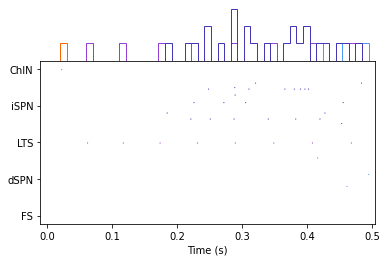

<Figure size 432x288 with 0 Axes>

Saving networks/tinySim/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [5]:
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/tinySim/simulation/network-output-spikes-666.txt"
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
endTime = 0.1
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Check voltage traces for randomly the selected cells.

In [10]:
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

plotOffset = 0
skipTime = 0
nTracesMax = 5

fileName = "networks/tinySim/simulation/volt_2.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
%matplotlib widget    
#npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
#npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
#npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
#npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6879 synapses and 10000 gap junctions
Load done. 0.05845671333372593
!!! Excluding first 0s from the plot
Plotting traces: [4, 6, 7, 9, 10]
Plotted 5 traces (total 99)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AttributeError: type object 'FigureCanvasBase' has no attribute 'start_event_loop_default'

Simulation analysis plots are saved as PDF files in the directory `networks/tinySim/figures`.

In [14]:
!ls networks/tinySim/figures/*.pdf

networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
networks/tinySim/fig

## Closing remarks

This example creates a very small striatal network. Size of the network and other parameters can be adjusted. For more information, please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide.

Questions and suggestions related to *Snudda* simulations, please address to the main developer, *Johannes Hjorth* [hjorth@kth.se](mailto:hjorth@kth.se).